In [1]:
from init import *
from helpers_analyses import *


Getting english data
Getting french data
Getting emotion words and bird names
number of overlapping words between Leuven and Rosch: 25
correlation between Leuven and Rosch ratings: (0.9519771567894879, 2.5885716906113406e-13)


In [2]:
# precompute measures
ks = [100]
t1, t2 = 9, -1
pos = NOUN

measures_emotion_eng = {}
measures_emotion_fra = {}
for k in ks:
    measures_emotion_eng[k] = nn_measure_over_words(words_eng, pos, pos_data, data, t1, t2, k)
    measures_emotion_fra[k] = nn_measure_over_words(words_fr, pos, pos_data_fr, data_fr, t1, t2, k)


English emotion words
                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     31.55
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           3.15e-20
Time:                        22:33:37   Log-Likelihood:                 157.63
No. Observations:                 123   AIC:                            -303.3
Df Residuals:                     117   BIC:                            -286.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           

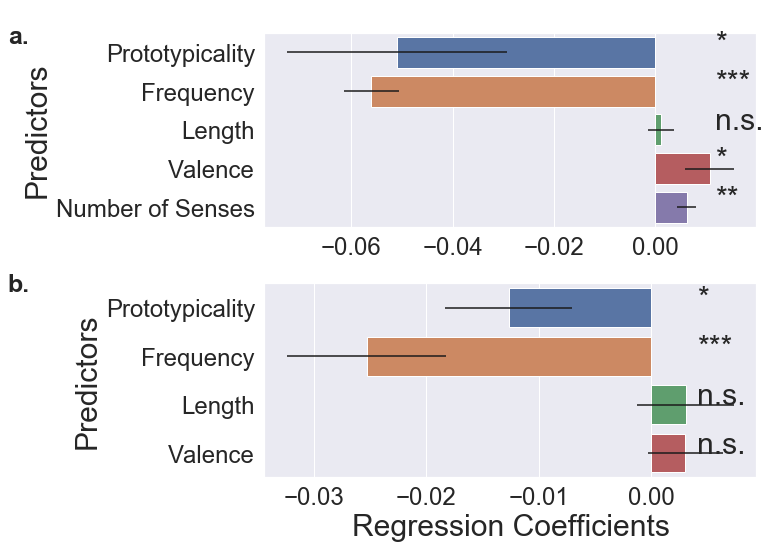

In [3]:
# Other factors in emotion semantic change
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set()
from helpers_HTE import get_senses
t_to_use = 1890

fig, axes = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(12, 8))

print('English emotion words')
emotion_eng_words = measures_emotion_eng[100].keys()
freqs = {w: np.log(freqs_all[w][t_to_use]) for w in emotion_eng_words}
senses, _ = get_senses(HTE_senses % ('n', TABLE1_1987), emotion_eng_words, t_to_use)
valence = read_table2_1987(table2_1987_path)
result_eng, n_eng, pr_eng, pp_eng, pr2_eng, pp2_eng = regression_results(emotion_eng_words, measures_emotion_eng[100], proto, freqs, senses, valence)
ax = axes[0]
ax = plot_coefficents(ax, result_eng, ['Prototypicality', 'Frequency', 'Length', 'Valence', 'Number of Senses',])
ax.set_xlabel('')

print('French emotion words')
emotion_fra_words = measures_emotion_fra[100].keys()
freqs = {w: np.log(freqs_all_fr[w][t_to_use]) for w in emotion_fra_words}
valence = read_table_1998_valence(french_1998_path)
result_fra, n_fra, pr_fra, pp_fra, pr2_fra, pp2_fra = regression_results(emotion_fra_words, measures_emotion_fra[100], proto_fr, freqs, valence=valence)
ax = axes[1]
ax = plot_coefficents(ax, result_fra, ['Prototypicality', 'Frequency', 'Length', 'Valence'])


axes[0].annotate('b.',
            xy=(-0.5, 0.48), xytext=(-0.2, 0.48),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=25, weight='bold', ha='center', va='center')
axes[0].annotate('a.',
            xy=(-0.5, 0.93), xytext=(-0.2, 0.93),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            fontsize=25, weight='bold', ha='center', va='center')

plt.tight_layout()
img_format = 'svg'
plt.savefig('images/figure_other_factors.'+img_format, format=img_format, bbox_inches='tight')


